In [1]:
import numpy as np
import matplotlib.pyplot as plt

from hmmlearn import hmm

In [2]:
gen_model = hmm.CategoricalHMM(n_components=2, random_state=99)


In [3]:
gen_model.startprob_ = np.array([0.4, 0.6])


In [4]:
gen_model.transmat_ = np.array([[0.7, 0.3],
                                [0.5, 0.5]])

In [5]:
gen_model.emissionprob_ = \
    np.array([[0.8,0.1,0.1],[0.2,0.3,0.5]])

In [6]:
color, gen_states = gen_model.sample(30000)


C:\Users\pratham\AppData\Local\Temp\ipykernel_16268\4152593037.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


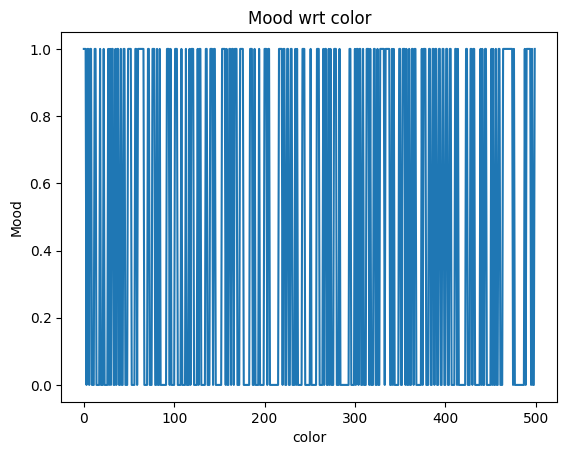

In [7]:
fig, ax = plt.subplots()
ax.plot(gen_states[:500])
ax.set_title('Mood wrt color')
ax.set_xlabel('color')
ax.set_ylabel('Mood')
fig.show()

C:\Users\pratham\AppData\Local\Temp\ipykernel_16268\2990164023.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


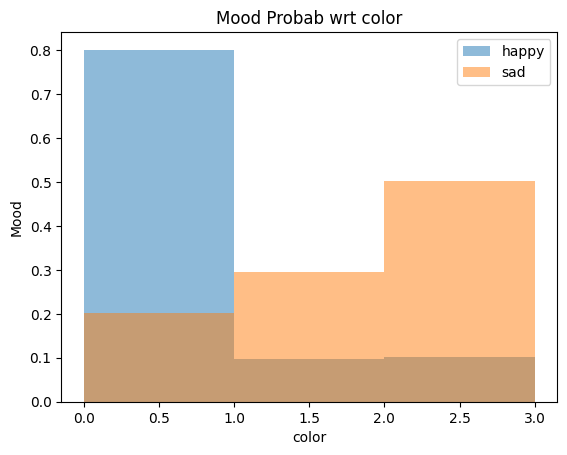

In [8]:
fig, ax = plt.subplots()
ax.hist(color[gen_states == 0], label='happy', alpha=0.5, #aplha transperancy
        bins=np.arange(4), density=True)
ax.hist(color[gen_states == 1], label='sad', alpha=0.5,
        bins=np.arange(4), density=True)
ax.set_title('Mood Probab wrt color')
ax.set_xlabel('color')
ax.set_ylabel('Mood')
ax.legend()
fig.show()

In [9]:
split_index=int(0.7*len(color))
X_train = color[:split_index]
X_validate = color[split_index:]

In [10]:
gen_score = gen_model.score(X_validate)


In [19]:
best_score = best_model = None #Both the variable have null value
n_fits = 50 #No. of HMM model to fit during loop 
np.random.seed(13)

#sets the random seed for NumPy's random number generator. 
#This ensures that the sequence of random numbers generated 
#by NumPy will be reproducible, 
#meaning that running the same code with the same random seed 
#will produce the same 
#sequence of random numbers every time.

#Setting the random seed to different values changes the internal 
#state of the random number generator,
#leading to different sequences of random numbers being generated.


#we are running a loop to fit several Hidden Markov Models (HMMs) 
#to some training data and then selecting the best-performing model
#based on its score on validation data. 


for idx in range(n_fits):
    model = hmm.CategoricalHMM(
        n_components=2, random_state=idx,
        init_params='se') #The init_params='se' argument indicates that only 
                          #the start and emission parameters of the model
                          #will be initialized, not the transition parameters
    
    # don't init transition, set it below
    # we need to initialize with random transition matrix probabilities
    # because the default is an even likelihood transition
   
    # initializing transition probabilities with random values from a 
    # Dirichlet distribution provides an initial assumption about state
    # transitions, setting starting probabilities complements this initialization
    # by defining the initial state distribution of the model

    model.transmat_ = np.array([np.random.dirichlet([0.5, 0.5]),
                                np.random.dirichlet([0.5, 0.5])])
    model.fit(X_train)
    score = model.score(X_validate)
    print(f'Model #{idx}\tScore: {score}')
    if best_score is None or score > best_score:
        best_model = model
        best_score = score


Model #0	Score: -8712.262514519845
Model #1	Score: -8723.710020333538
Model #2	Score: -8712.40404580402
Model #3	Score: -8713.67622397269
Model #4	Score: -8712.614383318447
Model #5	Score: -8709.980929603911
Model #6	Score: -8716.899781254027
Model #7	Score: -8707.152928078463
Model #8	Score: -8704.415224481849
Model #9	Score: -8706.595445015488
Model #10	Score: -8711.118388680065
Model #11	Score: -8710.8880954588
Model #12	Score: -8705.134841274978
Model #13	Score: -8716.2047821455
Model #14	Score: -8710.916232576981
Model #15	Score: -8713.664906157164
Model #16	Score: -8692.216319204661
Model #17	Score: -8698.775781091004
Model #18	Score: -8717.787580890963
Model #19	Score: -8711.985516008743
Model #20	Score: -8702.427581911383
Model #21	Score: -8715.803398885437
Model #22	Score: -8706.755815175378
Model #23	Score: -8713.816415648791
Model #24	Score: -8712.65111622144
Model #25	Score: -8705.996490770603
Model #26	Score: -8704.027330211598
Model #27	Score: -8714.849366351475
Model #28

In [21]:
print(f'Generated score: {gen_score}\nBest score:      {best_score}')


Generated score: -8690.052237491756
Best score:      -8692.216319204661


C:\Users\pratham\AppData\Local\Temp\ipykernel_16268\1561872067.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


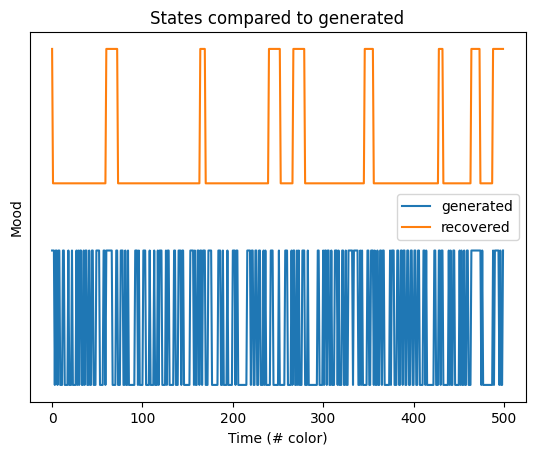

In [23]:
states = best_model.predict(color)

# plot our recovered states compared to generated (aim 1)
fig, ax = plt.subplots()
ax.plot(gen_states[:500], label='generated')
ax.plot(states[:500] + 1.5, label='recovered')
ax.set_yticks([])
ax.set_title('States compared to generated')
ax.set_xlabel('Time (# color)')
ax.set_ylabel('Mood')
ax.legend()
fig.show()

In [15]:
print(f'Transmission Matrix Generated:\n{gen_model.transmat_.round(3)}\n\n'
      f'Transmission Matrix Recovered:\n{best_model.transmat_.round(3)}\n\n')

# %%
# Finally, let's see if we can tell how the die is loaded.

print(f'Emission Matrix Generated:\n{gen_model.emissionprob_.round(3)}\n\n'
      f'Emission Matrix Recovered:\n{best_model.emissionprob_.round(3)}\n\n')


Transmission Matrix Generated:
[[0.7 0.3]
 [0.5 0.5]]

Transmission Matrix Recovered:
[[0.826 0.174]
 [0.356 0.644]]


Emission Matrix Generated:
[[0.8 0.1 0.1]
 [0.2 0.3 0.5]]

Emission Matrix Recovered:
[[0.686 0.113 0.201]
 [0.362 0.289 0.35 ]]


